# Version 1 - all codes were shamelessly generated by world's strongest policy optimization - ze minimum

> Create complete Kaggle code that use EfficientNet2B CNN with no Imagenet weight & no classification top and MLP (Dense layer) and concatenate their flatten features and put Dense regression head on it with MSE loss, the input for CNN branch is .png 3201x3201px RGB images named with ID, the input for MLP branch is .csv with 6 tabular features that one feature is 3 categories that will need to be apply one-hot encoding and ID column that related to the picture name. << how I ordered pizza \
\
Output only completed code

> can we have 5-fold cross validation

> use train.csv for tabular data input and produce submission.csv from model predict the test.csv

> Transform image into 256x256 before load into model because I got out of memory error (orivirginal is 3201x3201 EDA by trivial "you can see")

**Resize 256x256 might destroy physical information... - Scale Invariantness**

**Perpetual motion machine (Kaggle's CPU accelerator) only is possible, but at what cost...**

# v1.2 IT WORKED

In [2]:
# import numpy as np
# import pandas as pd
# import tensorflow as tf
# from tensorflow.keras.applications import EfficientNetB2
# from tensorflow.keras.layers import Input, Dense, Flatten, Concatenate
# from tensorflow.keras.models import Model
# from sklearn.model_selection import KFold
# from sklearn.preprocessing import OneHotEncoder
# from tensorflow.keras.optimizers import Adam
# import os
# import cv2

# # Set magic for image size adjustment
# magic = 1  # 0-3 most economical
# IMAGE_SIZE = int(1024 / pow(2, magic))  # Adjustable image size
# BATCH_SIZE = int(16 / pow(2, magic))
# MAX_EPOCHS = int(20 * pow(2, magic))

# # Load the data
# image_dir = '/kaggle/input/dlai-8-porosity-challenge/images'  # change this to your image directory
# train_csv_file = '/kaggle/input/dlai-8-porosity-challenge/train.csv'  # change this to your train CSV file
# test_csv_file = '/kaggle/input/dlai-8-porosity-challenge/test.csv'  # change this to your test CSV file

# # Read the CSV files
# train_df = pd.read_csv(train_csv_file)
# test_df = pd.read_csv(test_csv_file)

# # Preprocess the tabular data
# categorical_feature = 'Type'  # change this to your categorical feature column
# categorical_encoder = OneHotEncoder()
# categorical_encoded_train = categorical_encoder.fit_transform(train_df[[categorical_feature]]).toarray()
# categorical_encoded_test = categorical_encoder.transform(test_df[[categorical_feature]]).toarray()

# # Concatenate the one-hot encoded categorical feature with the other features
# tabular_train_data = train_df.drop(columns=[categorical_feature, 'ID'])
# tabular_train_data = np.concatenate([tabular_train_data.values, categorical_encoded_train], axis=1)

# tabular_test_data = test_df.drop(columns=[categorical_feature, 'ID'])
# tabular_test_data = np.concatenate([tabular_test_data.values, categorical_encoded_test], axis=1)

# # Ensure both training and testing data have the same number of columns
# if tabular_train_data.shape[1] != tabular_test_data.shape[1]:
#     num_columns_to_add = tabular_train_data.shape[1] - tabular_test_data.shape[1]
#     tabular_test_data = np.concatenate([tabular_test_data, np.zeros((tabular_test_data.shape[0], num_columns_to_add))], axis=1)

# # Function to load images
# def load_image(image_id):
#     image_path = os.path.join(image_dir, f'{image_id}.png')
#     image = cv2.imread(image_path)
#     image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))
#     return image

# # Load all images
# train_images = np.array([load_image(image_id) for image_id in train_df['ID']])
# test_images = np.array([load_image(image_id) for image_id in test_df['ID']])

# # Define the model creation function
# def create_model(input_shape_image, input_shape_tabular):
#     # Image branch
#     image_input = Input(shape=input_shape_image)
#     efficientnet = EfficientNetB2(include_top=False, weights=None, input_tensor=image_input)
#     flatten_image = Flatten()(efficientnet.output)

#     # MLP branch
#     mlp_input = Input(shape=input_shape_tabular)
#     dense1 = Dense(128, activation='relu')(mlp_input)
#     dense2 = Dense(64, activation='relu')(dense1)
#     flatten_mlp = Flatten()(dense2)

#     # Concatenate features
#     concat = Concatenate()([flatten_image, flatten_mlp])

#     # Regression head
#     dense3 = Dense(64, activation='relu')(concat)
#     output = Dense(1)(dense3)

#     # Create the model
#     model = Model(inputs=[image_input, mlp_input], outputs=output)

#     # Compile the model
#     model.compile(optimizer=Adam(learning_rate=1e-4), loss='mean_squared_error')
#     return model

# # 5-fold cross-validation
# kf = KFold(n_splits=5, shuffle=True, random_state=42)
# fold = 1
# histories = []

# for train_index, val_index in kf.split(tabular_train_data):
#     X_tabular_train, X_tabular_val = tabular_train_data[train_index], tabular_train_data[val_index]
#     X_image_train, X_image_val = train_images[train_index], train_images[val_index]
#     y_train, y_val = train_df['Log Permeability'].iloc[train_index], train_df['Log Permeability'].iloc[val_index]

#     # Create the model
#     model = create_model((IMAGE_SIZE, IMAGE_SIZE, 3), (tabular_train_data.shape[1],))

#     # Train the model
#     history = model.fit(
#         [X_image_train, X_tabular_train], y_train,
#         validation_data=([X_image_val, X_tabular_val], y_val),
#         epochs=MAX_EPOCHS,
#         batch_size=BATCH_SIZE,
#     )

#     # Save the history
#     histories.append(history)

#     print(f'Completed fold {fold}')
#     fold += 1

# # Training the model on the entire dataset for final predictions
# model = create_model((IMAGE_SIZE, IMAGE_SIZE, 3), (tabular_train_data.shape[1],))
# model.fit(
#     [train_images, tabular_train_data], train_df['Log Permeability'],
#     epochs=MAX_EPOCHS,
#     batch_size=BATCH_SIZE
# )

# # Predicting on the test set
# predictions = model.predict([test_images, tabular_test_data])

# # Create the submission DataFrame
# submission_df = pd.DataFrame({'ID': test_df['ID'], 'Log Permeability': predictions.flatten()})

# # Save the submission DataFrame to a CSV file
# submission_file = 'submission.csv'
# submission_df.to_csv(submission_file, index=False)

# print(f'Submission file {submission_file} created successfully!')
# print(submission_df.head())


In [3]:
# model.summary()

# !pip install visualkeras

# import visualkeras

# visualkeras.layered_view(model).show()

# visualkeras.layered_view(model)

# Version 5 im bacc (best attempt - 0.53 private LB 77% rest data)

In [10]:
# import numpy as np
# import pandas as pd
# import tensorflow as tf
# import sklearn
# from tensorflow.keras.applications import EfficientNetB2
# from tensorflow.keras.layers import Input, Dense, Flatten, Concatenate, Dropout
# from tensorflow.keras.models import Model
# from sklearn.model_selection import KFold
# from sklearn.preprocessing import OneHotEncoder
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.callbacks import EarlyStopping, Callback
# import os
# import cv2
# from tqdm import tqdm

# # Print library versions
# print(f'TensorFlow Version: {tf.__version__}')
# print(f'Scikit-learn Version: {sklearn.__version__}')
# print(f'NumPy Version: {np.__version__}')
# print(f'Pandas Version: {pd.__version__}')
# print(f'OpenCV Version: {cv2.__version__}')

# # Set random seeds for reproducibility
# random_seed = 26
# np.random.seed(random_seed)
# tf.random.set_seed(random_seed)
# os.environ['PYTHONHASHSEED'] = str(random_seed)

# # Switch for enabling/disabling cosine decay and early stopping
# ENABLE_CALLBACKS = True
# USE_TWO_GPUS = False  # Switch to use 2 GPUs

# # Check for available GPUs
# gpus = tf.config.experimental.list_physical_devices('GPU')
# if gpus:
#     print(f"Available GPUs: {len(gpus)}")
#     if USE_TWO_GPUS and len(gpus) >= 2:
#         strategy = tf.distribute.MirroredStrategy()
#         print('Using 2 GPUs with MirroredStrategy.')
#     else:
# #         strategy = tf.distribute.OneDeviceStrategy(device="/gpu:0")
# #         print('Using 1 GPU with OneDeviceStrategy.')
#         tf.config.experimental.set_visible_devices(gpus[0], 'GPU')  # Use the first GPU
#         tf.config.experimental.set_memory_growth(gpus[0], True)
#         logical_gpus = tf.config.experimental.list_logical_devices('GPU')
#         print(f'Using GPU: {logical_gpus[0]}')
# else:
# #     strategy = tf.distribute.OneDeviceStrategy(device="/cpu:0")
#     print('No GPU available, falling back to CPU.')

# # Set magic for image size adjustment
# magic = 1  # 1-3 most economical
# IMAGE_SIZE = int(1024 / pow(2, magic))  # Adjustable image size
# BATCH_SIZE = int(16 / pow(2, magic))
# MAX_EPOCHS = int(20 * pow(2, magic))

# # Load the data
# image_dir = '/kaggle/input/dlai-8-porosity-challenge/images'  # change this to your image directory
# train_csv_file = '/kaggle/input/dlai-8-porosity-challenge/train.csv'  # change this to your train CSV file
# test_csv_file = '/kaggle/input/dlai-8-porosity-challenge/test.csv'  # change this to your test CSV file

# # Read the CSV files
# train_df = pd.read_csv(train_csv_file)
# test_df = pd.read_csv(test_csv_file)

# # Preprocess the tabular data
# categorical_feature = 'Type'  # change this to your categorical feature column
# categorical_encoder = OneHotEncoder()
# categorical_encoded_train = categorical_encoder.fit_transform(train_df[[categorical_feature]]).toarray()
# categorical_encoded_test = categorical_encoder.transform(test_df[[categorical_feature]]).toarray()

# # Concatenate the one-hot encoded categorical feature with the other features
# tabular_train_data = train_df.drop(columns=[categorical_feature, 'ID'])
# tabular_train_data = np.concatenate([tabular_train_data.values, categorical_encoded_train], axis=1)

# tabular_test_data = test_df.drop(columns=[categorical_feature, 'ID'])
# tabular_test_data = np.concatenate([tabular_test_data.values, categorical_encoded_test], axis=1)

# # Ensure both training and testing data have the same number of columns
# if tabular_train_data.shape[1] != tabular_test_data.shape[1]:
#     num_columns_to_add = tabular_train_data.shape[1] - tabular_test_data.shape[1]
#     tabular_test_data = np.concatenate([tabular_test_data, np.zeros((tabular_test_data.shape[0], num_columns_to_add))], axis=1)

# # Function to load images
# def load_image(image_id):
#     image_path = os.path.join(image_dir, f'{image_id}.png')
#     image = cv2.imread(image_path)
#     image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))
#     return image

# # Load all images
# train_images = np.array([load_image(image_id) for image_id in tqdm(train_df['ID'], desc="Loading training images")])
# test_images = np.array([load_image(image_id) for image_id in tqdm(test_df['ID'], desc="Loading test images")])

# # Define the model creation function
# def create_model(input_shape_image, input_shape_tabular):
#     # Image branch
#     image_input = Input(shape=input_shape_image)
#     efficientnet = EfficientNetB2(include_top=False, weights=None, input_tensor=image_input)
#     flatten_image = Flatten()(efficientnet.output)

#     # MLP branch
#     mlp_input = Input(shape=input_shape_tabular)
#     dense1 = Dense(128, activation='relu')(mlp_input)
#     dropout1 = Dropout(0.5)(dense1)
#     dense2 = Dense(64, activation='relu')(dropout1)
#     dropout2 = Dropout(0.5)(dense2)
#     flatten_mlp = Flatten()(dropout2)

#     # Concatenate features
#     concat = Concatenate()([flatten_image, flatten_mlp])

#     # Regression head
#     dense3 = Dense(64, activation='relu')(concat)
#     output = Dense(1)(dense3)

#     # Create the model
#     model = Model(inputs=[image_input, mlp_input], outputs=output)

#     # Compile the model
#     model.compile(optimizer=Adam(learning_rate=1e-4), loss='mean_squared_error')
#     return model

# # Cosine decay scheduler
# def cosine_decay_scheduler(initial_lr, epochs):
#     def scheduler(epoch):
#         return float(initial_lr * (tf.math.cos(tf.constant(np.pi) * epoch / epochs) + 1) / 2)
#     return tf.keras.callbacks.LearningRateScheduler(scheduler)

# # Callbacks
# early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# cosine_scheduler = cosine_decay_scheduler(initial_lr=1e-4, epochs=MAX_EPOCHS)

# callbacks = [early_stopping, cosine_scheduler] if ENABLE_CALLBACKS else []

# # 5-fold cross-validation
# kf = KFold(n_splits=5, shuffle=True, random_state=random_seed)
# fold = 1
# histories = []

# for train_index, val_index in kf.split(tabular_train_data):
#     X_tabular_train, X_tabular_val = tabular_train_data[train_index], tabular_train_data[val_index]
#     X_image_train, X_image_val = train_images[train_index], train_images[val_index]
#     y_train, y_val = train_df['Log Permeability'].iloc[train_index], train_df['Log Permeability'].iloc[val_index]

#     # Create the model
#     model = create_model((IMAGE_SIZE, IMAGE_SIZE, 3), (tabular_train_data.shape[1],))

#     # Train the model
#     history = model.fit(
#         [X_image_train, X_tabular_train], y_train,
#         validation_data=([X_image_val, X_tabular_val], y_val),
#         epochs=MAX_EPOCHS,
#         batch_size=BATCH_SIZE,
#         callbacks=callbacks
#     )

#     # Save the history
#     histories.append(history)

#     print(f'Completed fold {fold}')
#     fold += 1

# # Training the model on the entire dataset for final predictions
# model = create_model((IMAGE_SIZE, IMAGE_SIZE, 3), (tabular_train_data.shape[1],))
# model.fit(
#     [train_images, tabular_train_data], train_df['Log Permeability'],
#     epochs=MAX_EPOCHS,
#     batch_size=BATCH_SIZE,
#     callbacks=callbacks
# )

# # Predicting on the test set
# predictions = model.predict([test_images, tabular_test_data])

# # Create the submission DataFrame
# submission_df = pd.DataFrame({'ID': test_df['ID'], 'Log Permeability': predictions.flatten()})

# # Save the submission DataFrame to a CSV file
# submission_file = 'submission.csv'
# submission_df.to_csv(submission_file, index=False)

# print(f'Submission file {submission_file} created successfully!')
# print(submission_df.head())


# Version Six

2024-07-17 11:14:33.681505: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered

2024-07-17 11:14:33.681625: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered

2024-07-17 11:14:33.815836: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


TensorFlow Version: 2.15.0

Scikit-learn Version: 1.2.2

NumPy Version: 1.26.4

Pandas Version: 2.2.2

OpenCV Version: 4.10.0

Available GPUs: 1

Using GPU: LogicalDevice(name='/device:GPU:0', device_type='GPU')


Loading training images: 100%|██████████| 255/255 [00:15<00:00, 16.41it/s]

Loading test images: 100%|██████████| 64/64 [00:03<00:00, 16.44it/s]


Epoch 1/40



I0000 00:00:1721215044.808527      69 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


 1/26 ━━━━━━━━━━━━━━━━━━━━ 57:42 139s/step - loss: 86.4980

W0000 00:00:1721215045.130795      69 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 29.1893   

W0000 00:00:1721215138.917506      66 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


26/26 ━━━━━━━━━━━━━━━━━━━━ 241s 4s/step - loss: 28.7331 - val_loss: 42.1410 - learning_rate: 1.0000e-04

Epoch 2/40

26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 229ms/step - loss: 104.8364 - val_loss: 17.5091 - learning_rate: 9.9846e-05

Epoch 3/40

26/26 ━━━━━━━━━━━━━━━━━━━━ 10s 231ms/step - loss: 5.6129 - val_loss: 12.4030 - learning_rate: 9.9384e-05

Epoch 4/40

26/26 ━━━━━━━━━━━━━━━━━━━━ 10s 230ms/step - loss: 3.1554 - val_loss: 3.0140 - learning_rate: 9.8618e-05

Epoch 5/40

26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 220ms/step - loss: 3.3617 - val_loss: 7.1033 - learning_rate: 9.7553e-05

Epoch 6/40

26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 219ms/step - loss: 3.7908 - val_loss: 5.9343 - learning_rate: 9.6194e-05

Epoch 7/40

26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 217ms/step - loss: 1.4646 - val_loss: 5.9770 - learning_rate: 9.4550e-05

Epoch 8/40

26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 218ms/step - loss: 1.6989 - val_loss: 5.9731 - learning_rate: 9.2632e-05

Epoch 9/40

26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 226ms/step - loss: 1.1448 - val_los

W0000 00:00:1721215461.167705      66 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 30.1480   

W0000 00:00:1721215538.271770      67 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


26/26 ━━━━━━━━━━━━━━━━━━━━ 200s 3s/step - loss: 29.6496 - val_loss: 39.9204 - learning_rate: 1.0000e-04

Epoch 2/40

26/26 ━━━━━━━━━━━━━━━━━━━━ 56s 219ms/step - loss: 29.5337 - val_loss: 20.1251 - learning_rate: 9.9846e-05

Epoch 3/40

26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 219ms/step - loss: 3.8199 - val_loss: 9.9252 - learning_rate: 9.9384e-05

Epoch 4/40

26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 218ms/step - loss: 3.7121 - val_loss: 8.9906 - learning_rate: 9.8618e-05

Epoch 5/40

26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 218ms/step - loss: 1.9690 - val_loss: 4.7375 - learning_rate: 9.7553e-05

Epoch 6/40

26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 218ms/step - loss: 2.5342 - val_loss: 3.3631 - learning_rate: 9.6194e-05

Epoch 7/40

26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 218ms/step - loss: 1.6085 - val_loss: 4.4641 - learning_rate: 9.4550e-05

Epoch 8/40

26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 218ms/step - loss: 1.9444 - val_loss: 0.7233 - learning_rate: 9.2632e-05

Epoch 9/40

26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 218ms/step - loss: 1.8192 - val_loss: 

W0000 00:00:1721215763.669499      68 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 38.1047   

W0000 00:00:1721215839.664680      69 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


26/26 ━━━━━━━━━━━━━━━━━━━━ 197s 3s/step - loss: 37.6344 - val_loss: 30.3311 - learning_rate: 1.0000e-04

Epoch 2/40

26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 217ms/step - loss: 115.4055 - val_loss: 11.6828 - learning_rate: 9.9846e-05

Epoch 3/40

26/26 ━━━━━━━━━━━━━━━━━━━━ 10s 217ms/step - loss: 9.4059 - val_loss: 21.5680 - learning_rate: 9.9384e-05

Epoch 4/40

26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 217ms/step - loss: 7.0040 - val_loss: 12.0608 - learning_rate: 9.8618e-05

Epoch 5/40

26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 216ms/step - loss: 5.3689 - val_loss: 8.5412 - learning_rate: 9.7553e-05

Epoch 6/40

26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 217ms/step - loss: 3.0086 - val_loss: 7.3754 - learning_rate: 9.6194e-05

Epoch 7/40

26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 217ms/step - loss: 1.5681 - val_loss: 1.2011 - learning_rate: 9.4550e-05

Epoch 8/40

26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 218ms/step - loss: 2.2260 - val_loss: 4.8483 - learning_rate: 9.2632e-05

Epoch 9/40

26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 217ms/step - loss: 1.1815 - val_los

W0000 00:00:1721216019.141354      69 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 46.5016   

W0000 00:00:1721216097.401160      69 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


26/26 ━━━━━━━━━━━━━━━━━━━━ 201s 3s/step - loss: 45.7443 - val_loss: 35.2994 - learning_rate: 1.0000e-04

Epoch 2/40

26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 217ms/step - loss: 95.2180 - val_loss: 20.9041 - learning_rate: 9.9846e-05

Epoch 3/40

26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 218ms/step - loss: 12.1141 - val_loss: 10.4283 - learning_rate: 9.9384e-05

Epoch 4/40

26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 218ms/step - loss: 14.7878 - val_loss: 7.7003 - learning_rate: 9.8618e-05

Epoch 5/40

26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 218ms/step - loss: 3.8616 - val_loss: 5.7539 - learning_rate: 9.7553e-05

Epoch 6/40

26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 218ms/step - loss: 1.8514 - val_loss: 8.4430 - learning_rate: 9.6194e-05

Epoch 7/40

26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 217ms/step - loss: 2.9827 - val_loss: 5.8608 - learning_rate: 9.4550e-05

Epoch 8/40

26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 217ms/step - loss: 2.1901 - val_loss: 7.3921 - learning_rate: 9.2632e-05

Epoch 9/40

26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 217ms/step - loss: 1.8770 - val_loss

W0000 00:00:1721216271.955548      67 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 30.1889   

W0000 00:00:1721216350.489649      66 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


26/26 ━━━━━━━━━━━━━━━━━━━━ 200s 3s/step - loss: 29.8150 - val_loss: 33.5586 - learning_rate: 1.0000e-04

Epoch 2/40

26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 221ms/step - loss: 20.6809 - val_loss: 23.8309 - learning_rate: 9.9846e-05

Epoch 3/40

26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 222ms/step - loss: 5.2034 - val_loss: 18.9022 - learning_rate: 9.9384e-05

Epoch 4/40

26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 223ms/step - loss: 3.6825 - val_loss: 4.1533 - learning_rate: 9.8618e-05

Epoch 5/40

26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 224ms/step - loss: 2.3947 - val_loss: 11.4720 - learning_rate: 9.7553e-05

Epoch 6/40

26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 223ms/step - loss: 1.5282 - val_loss: 8.9687 - learning_rate: 9.6194e-05

Epoch 7/40

26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 223ms/step - loss: 2.1106 - val_loss: 3.2698 - learning_rate: 9.4550e-05

Epoch 8/40

26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 223ms/step - loss: 1.5447 - val_loss: 3.1724 - learning_rate: 9.2632e-05

Epoch 9/40

26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 223ms/step - loss: 1.4677 - val_loss:

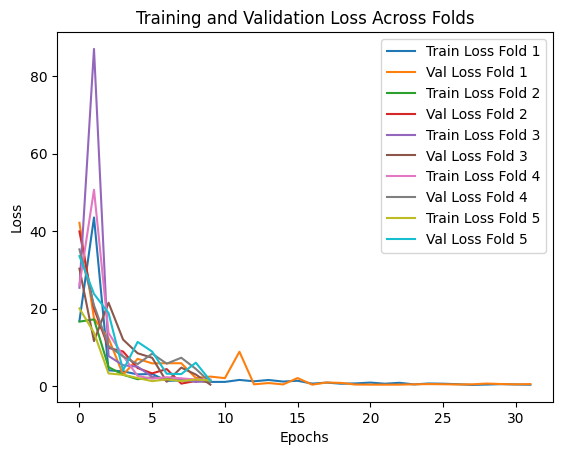

Epoch 1/40

 1/32 ━━━━━━━━━━━━━━━━━━━━ 1:10:03 136s/step - loss: 71.0509

W0000 00:00:1721216545.177569      69 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


32/32 ━━━━━━━━━━━━━━━━━━━━ 250s 4s/step - loss: 43.6662 - learning_rate: 1.0000e-04

Epoch 2/40


/opt/conda/lib/python3.10/site-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss

  current = self.get_monitor_value(logs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 212ms/step - loss: 168.6344 - learning_rate: 9.9846e-05

Epoch 3/40

32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 213ms/step - loss: 8.5030 - learning_rate: 9.9384e-05

Epoch 4/40

32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 212ms/step - loss: 3.8022 - learning_rate: 9.8618e-05

Epoch 5/40

32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 214ms/step - loss: 3.9396 - learning_rate: 9.7553e-05

Epoch 6/40

32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 212ms/step - loss: 5.1762 - learning_rate: 9.6194e-05

Epoch 7/40

32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 213ms/step - loss: 4.0307 - learning_rate: 9.4550e-05

Epoch 8/40

32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 212ms/step - loss: 3.0041 - learning_rate: 9.2632e-05

Epoch 9/40

32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 212ms/step - loss: 3.4559 - learning_rate: 9.0451e-05

Epoch 10/40

32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 211ms/step - loss: 2.5810 - learning_rate: 8.8020e-05

Epoch 11/40

32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 212ms/step - loss: 2.2011 - learning_rate: 8.5355e-05

Epoch 12/40

32/32 ━━━━━━━━━━━━━━━━━━

In [11]:
import numpy as np
import pandas as pd
import tensorflow as tf
import sklearn
from tensorflow.keras.applications import EfficientNetB2
from tensorflow.keras.layers import Input, Dense, Flatten, Concatenate, Dropout
from tensorflow.keras.models import Model
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, Callback
import os
import cv2
from tqdm import tqdm
import matplotlib.pyplot as plt

# Print library versions
print(f'TensorFlow Version: {tf.__version__}')
print(f'Scikit-learn Version: {sklearn.__version__}')
print(f'NumPy Version: {np.__version__}')
print(f'Pandas Version: {pd.__version__}')
print(f'OpenCV Version: {cv2.__version__}')

# Set random seeds for reproducibility
random_seed = 26
np.random.seed(random_seed)
tf.random.set_seed(random_seed)
os.environ['PYTHONHASHSEED'] = str(random_seed)

# Switch for enabling/disabling cosine decay and early stopping
ENABLE_CALLBACKS = True
USE_TWO_GPUS = False  # Switch to use 2 GPUs

# Check for available GPUs
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    print(f"Available GPUs: {len(gpus)}")
    if USE_TWO_GPUS and len(gpus) >= 2:
        strategy = tf.distribute.MirroredStrategy()
        print('Using 2 GPUs with MirroredStrategy.')
    else:
        tf.config.experimental.set_visible_devices(gpus[0], 'GPU')  # Use the first GPU
        tf.config.experimental.set_memory_growth(gpus[0], True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(f'Using GPU: {logical_gpus[0]}')
else:
    print('No GPU available, falling back to CPU.')

# Set magic for image size adjustment
magic = 1  # 1-3 most economical
IMAGE_SIZE = int(1024 / pow(2, magic))  # Adjustable image size
BATCH_SIZE = int(16 / pow(2, magic))
MAX_EPOCHS = int(20 * pow(2, magic))

# Load the data
image_dir = '/kaggle/input/dlai-8-porosity-challenge/images'  # change this to your image directory
train_csv_file = '/kaggle/input/dlai-8-porosity-challenge/train.csv'  # change this to your train CSV file
test_csv_file = '/kaggle/input/dlai-8-porosity-challenge/test.csv'  # change this to your test CSV file

# Read the CSV files
train_df = pd.read_csv(train_csv_file)
test_df = pd.read_csv(test_csv_file)

# Preprocess the tabular data
categorical_feature = 'Type'  # change this to your categorical feature column
categorical_encoder = OneHotEncoder()
categorical_encoded_train = categorical_encoder.fit_transform(train_df[[categorical_feature]]).toarray()
categorical_encoded_test = categorical_encoder.transform(test_df[[categorical_feature]]).toarray()

# Perform min-max scaling on numerical features
numerical_features = train_df.drop(columns=[categorical_feature, 'ID', 'Log Permeability']).columns
scaler = MinMaxScaler()
scaled_numerical_train = scaler.fit_transform(train_df[numerical_features])
scaled_numerical_test = scaler.transform(test_df[numerical_features])

# Concatenate the scaled numerical features and one-hot encoded categorical feature with the other features
tabular_train_data = np.concatenate([scaled_numerical_train, categorical_encoded_train], axis=1)
tabular_test_data = np.concatenate([scaled_numerical_test, categorical_encoded_test], axis=1)

# Ensure both training and testing data have the same number of columns
if tabular_train_data.shape[1] != tabular_test_data.shape[1]:
    num_columns_to_add = tabular_train_data.shape[1] - tabular_test_data.shape[1]
    tabular_test_data = np.concatenate([tabular_test_data, np.zeros((tabular_test_data.shape[0], num_columns_to_add))], axis=1)

# Function to load images
def load_image(image_id):
    image_path = os.path.join(image_dir, f'{image_id}.png')
    image = cv2.imread(image_path)
    image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))
    return image

# Load all images
train_images = np.array([load_image(image_id) for image_id in tqdm(train_df['ID'], desc="Loading training images")])
test_images = np.array([load_image(image_id) for image_id in tqdm(test_df['ID'], desc="Loading test images")])

# Define the model creation function
def create_model(input_shape_image, input_shape_tabular):
    # Image branch
    image_input = Input(shape=input_shape_image)
    efficientnet = EfficientNetB2(include_top=False, weights=None, input_tensor=image_input)
    flatten_image = Flatten()(efficientnet.output)

    # MLP branch
    mlp_input = Input(shape=input_shape_tabular)
    dense1 = Dense(128, activation='relu')(mlp_input)
    dropout1 = Dropout(0.5)(dense1)
    dense2 = Dense(64, activation='relu')(dropout1)
    dropout2 = Dropout(0.5)(dense2)
    flatten_mlp = Flatten()(dropout2)

    # Concatenate features
    concat = Concatenate()([flatten_image, flatten_mlp])

    # Regression head
    dense3 = Dense(64, activation='relu')(concat)
    output = Dense(1)(dense3)

    # Create the model
    model = Model(inputs=[image_input, mlp_input], outputs=output)

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=1e-4), loss='mean_squared_error')
    return model

# Cosine decay scheduler
def cosine_decay_scheduler(initial_lr, epochs):
    def scheduler(epoch):
        return float(initial_lr * (tf.math.cos(tf.constant(np.pi) * epoch / epochs) + 1) / 2)
    return tf.keras.callbacks.LearningRateScheduler(scheduler)

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
cosine_scheduler = cosine_decay_scheduler(initial_lr=1e-4, epochs=MAX_EPOCHS)

callbacks = [early_stopping, cosine_scheduler] if ENABLE_CALLBACKS else []

# 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=random_seed)
fold = 1
histories = []

for train_index, val_index in kf.split(tabular_train_data):
    X_tabular_train, X_tabular_val = tabular_train_data[train_index], tabular_train_data[val_index]
    X_image_train, X_image_val = train_images[train_index], train_images[val_index]
    y_train, y_val = train_df['Log Permeability'].iloc[train_index], train_df['Log Permeability'].iloc[val_index]

    # Create the model
    model = create_model((IMAGE_SIZE, IMAGE_SIZE, 3), (tabular_train_data.shape[1],))

    # Train the model
    history = model.fit(
        [X_image_train, X_tabular_train], y_train,
        validation_data=([X_image_val, X_tabular_val], y_val),
        epochs=MAX_EPOCHS,
        batch_size=BATCH_SIZE,
        callbacks=callbacks
    )

    # Save the history
    histories.append(history)

    print(f'Completed fold {fold}')
    fold += 1

# Plot training and validation loss
for i, history in enumerate(histories):
    plt.plot(history.history['loss'], label=f'Train Loss Fold {i+1}')
    plt.plot(history.history['val_loss'], label=f'Val Loss Fold {i+1}')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Across Folds')
plt.legend()
plt.show()

# Training the model on the entire dataset for final predictions
model = create_model((IMAGE_SIZE, IMAGE_SIZE, 3), (tabular_train_data.shape[1],))
model.fit(
    [train_images, tabular_train_data], train_df['Log Permeability'],
    epochs=MAX_EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=callbacks
)

# Predicting on the test set
predictions = model.predict([test_images, tabular_test_data])

# Create the submission DataFrame
submission_df = pd.DataFrame({'ID': test_df['ID'], 'Log Permeability': predictions.flatten()})

# Save the submission DataFrame to a CSV file
submission_file = 'submission.csv'
submission_df.to_csv(submission_file, index=False)

print(f'Submission file {submission_file} created successfully!')
print(submission_df.head())
